# <center><b> Collaborative Filtering With Gaussian Mixtures</b></center>

The technique we used here for Collaborative Filtering is to use Multivariate Gaussian Mixtures to assign the data to a mixture. This has similarity with K-means where if we think the Gaussians as clusters and the mixtures as probability of being in a cluster. But unlike K-means, the clusters are not exclusive to each other. They can overlap. A small example will help to understand.

In [1]:
import numpy as np
import kmeans_clustering as kmeans
import tools
import em_simple
import em_method

To show how it works, we implement it on a toy dataset.

In [2]:
X = np.loadtxt("toy_data.txt")

In [3]:
k=3
seed=0

In [4]:
mix, post = tools.init( X, k, seed)
prob, post = em_simple.estep(X, mix)

print(X.shape,' and ',prob.shape, ' and ', post)

(250, 2)  and  (250, 3)  and  -1388.0818000440702


In [5]:
K = np.array([1,2,3,4])
seed = np.array([ 0, 1, 2, 3, 4])

In [15]:
kk= 3
for s in range(0,5):
    mix, post = tools.init( X, kk, s)
    mixture, post, ll = em_simple.run(X, mix, post)
    print('The cost for K = %d and seed %d is : '%(kk, s), ll)
#common.plot( X, mixture, post, title='The mixture model for K = %d and seed %d'%(kk, s))

The cost for K = 3 and seed 0 is :  -1138.8908996872674
The cost for K = 3 and seed 1 is :  -1138.8915268582045
The cost for K = 3 and seed 2 is :  -1138.8913232476136
The cost for K = 3 and seed 3 is :  -1138.8909601749288
The cost for K = 3 and seed 4 is :  -1138.891055801127


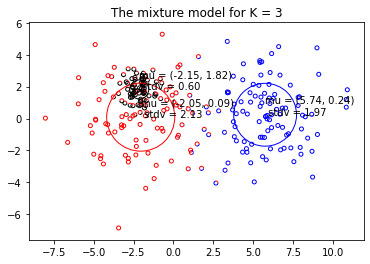

In [16]:
tools.plot( X, mixture, post, title='The mixture model for K = %d'%(kk))

We can already see how this does not look like a K-means clustering. Let's try some more examples and see how it is different and amazing.

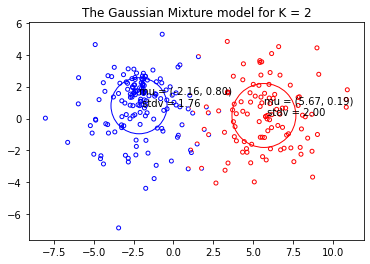

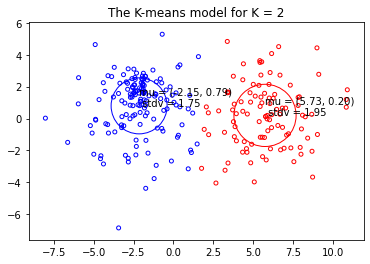

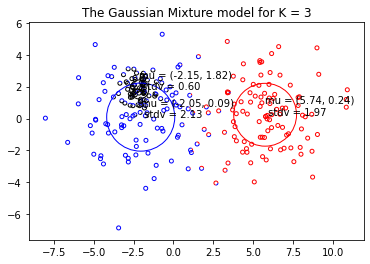

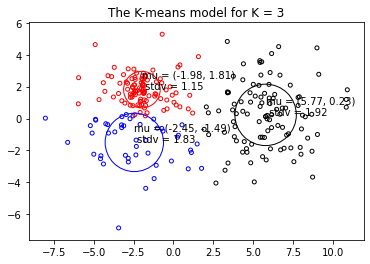

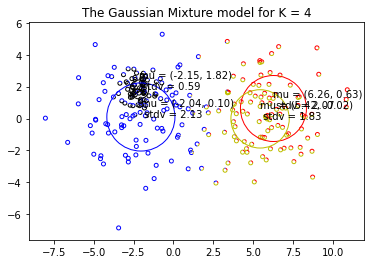

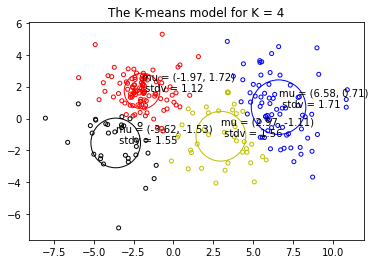

In [11]:
l = np.zeros_like(seed)
l2= np.zeros_like(seed)
for kk in range(2,5):
    for s in seed:
        mix, post = tools.init( X, kk, s)
        mixture, post, ll = em_simple.run(X, mix, post)
        mix2, post2 = tools.init( X, kk, s)
        mixture2, post2, cost = kmeans.run(X, mix2, post2)
        l2[s] = cost
        l[s]=ll
        #print( ll,' and')
    sm = l.argmin()
    sm2 = l2.argmin()
    
    mix, post = tools.init( X, kk, sm)
    mixture, post, ll = em_simple.run(X, mix, post)
    
    mix2, post2 = tools.init( X, kk, sm2)
    mixture2, post2, cost = kmeans.run(X, mix2, post2)
    
    tools.plot( X, mixture, post, title='The Gaussian Mixture model for K = %d'%(kk))
    tools.plot( X, mixture2, post2, title='The K-means model for K = %d'%(kk))

# Optimizing with <b>BIC</b> (Bayesian Information Criterion) 
So far, we have set the parameter K or the number of clusters. How can we know which K to choose? We bring a term called Bayesian Information Criterion or BIC.

In [12]:
s = 0
l= np.zeros_like(K)

for kk in K:
    mix, post = tools.init( X, kk, s)
    mixture, post, ll = em_simple.run(X, mix, post)
    l[kk-1] = tools.bic(X, mixture, ll)
    
print('Best K is = ',(l.argmax()+1))
print('Best BIC is ',l[l.argmax()])

Best K is =  3
Best BIC is  -1169


In [14]:
mix, post = tools.init( X, 3, s)
mixture, post, ll = em_simple.run(X, mix, post)
tools.bic(X, mixture, ll)

-1169.2589347355097